# Monte Carlo Simulation: Estimasi Kegagalan Balon Udara

**Mata Kuliah**: Permodelan dan Simulasi / B
  
**Nama**: Adrian Farrel Aziz Yatyoga

**NIM**: L0224040

## Tujuan
Menggunakan metode Monte Carlo untuk memperkirakan:
- Probabilitas kegagalan balon udara
- Rata-rata waktu hingga kegagalan
- Pengaruh ketidakpastian parameter (tekanan, suhu, kekuatan material)

## Asumsi Model
- Kegagalan terjadi jika **stress efektif > kekuatan material**
- Stress efektif = tekanan × (suhu / 100)
- Parameter diambil dari distribusi probabilistik realistis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gaya visual yang rapi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

"Parameter sengaja dibuat lebih riskan untuk memperjelas fenomena kegagalan dalam simulasi. Dalam praktik nyata, desain lebih konservatif."

In [ ]:
def simulate_balloon_failure(n_simulations=10000, seed=42):

# simulasi Monte Carlo untuk estimasi kegagalan balon udara

    np.random.seed(seed)
    
    # parameter realistis untuk balon udara (kain tipis)
    material_strength_mean = 4.0    # kPa
    material_strength_std = 1.0     # kPa
    
    # tekanan dasar & variasi
    pressure_base = 1.3            # kPa di atas atmosfer
    pressure_variation = 0.2        # variasi acak (angin, ketinggian)
    
    # suhu operasional
    temp_min = 80   # °C
    temp_max = 150  # °C

    strengths = []
    effective_stresses = []
    failure_times = []
    is_failure = []

    for _ in range(n_simulations):
        # sampling kekuatan material
        strength = np.random.normal(material_strength_mean, material_strength_std)
        # pastikan kekuatan tidak negatif
        strength = max(0.5, strength)
        
        # sampling suhu
        temperature = np.random.uniform(temp_min, temp_max)
        
        # titung tekanan berdasarkan suhu (Hukum Gay-Lussac: P ∝ T)
        T_K = temperature + 273.15
        T_ref = 100 + 273.15  # suhu referensi
        pressure = pressure_base * (T_K / T_ref)
        
        # tambahkan variasi acak (turbulensi, beban dinamis)
        pressure += np.random.normal(0, pressure_variation)
        pressure = max(0.1, pressure)  # tekanan minimal
        
        effective_stress = pressure
        
        strengths.append(strength)
        effective_stresses.append(effective_stress)
        
        if effective_stress > strength:
            is_failure.append(True)
            overload = effective_stress / strength
            time_to_failure = max(0.1, 5.0 / overload)  # max 5 jam operasi
        else:
            is_failure.append(False)
            time_to_failure = 5.0
        
        failure_times.append(time_to_failure)
    
    n_fail = sum(is_failure)
    prob_failure = n_fail / n_simulations
    mean_ttf = np.mean(failure_times)
    
    return {
        'n_simulations': n_simulations,
        'prob_failure': prob_failure,
        'mean_time_to_failure': mean_ttf,
        'n_failures': n_fail,
        'strengths': np.array(strengths),
        'effective_stresses': np.array(effective_stresses),
        'failure_times': np.array(failure_times),
        'is_failure': np.array(is_failure)
    }

In [100]:
N_SIMULATIONS = 1000 # ganti aja mba ini n nya mau berapa

# mulai simulasi    
results = simulate_balloon_failure(n_simulations=N_SIMULATIONS, seed=40)

# Tampilkan ringkasan
print("="*50)
print(f" HASIL SIMULASI MONTE CARLO")
print("="*50)
print(f"Jumlah simulasi (n)  : {results['n_simulations']:,}")
print(f"Jumlah kegagalan     : {results['n_failures']:,}")
print(f"Probabilitas gagal   : {results['prob_failure']:.4f} ({results['prob_failure']*100:.2f}%)")
print(f"Rata-rata waktu gagal: {results['mean_time_to_failure']:.2f} jam")
print("="*50)

 HASIL SIMULASI MONTE CARLO
Jumlah simulasi (n)  : 1,000
Jumlah kegagalan     : 5
Probabilitas gagal   : 0.0050 (0.50%)
Rata-rata waktu gagal: 4.99 jam


In [95]:
n = results['n_simulations']
mean_ttf = results['mean_time_to_failure']
strengths = results['strengths']
stresses = results['effective_stresses']
times = results['failure_times']
failures = results['is_failure']
n_fail = results['n_failures']
prob_fail = results['prob_failure']

 **Visualisasi Dist Waktu Hingga Kegagalan**

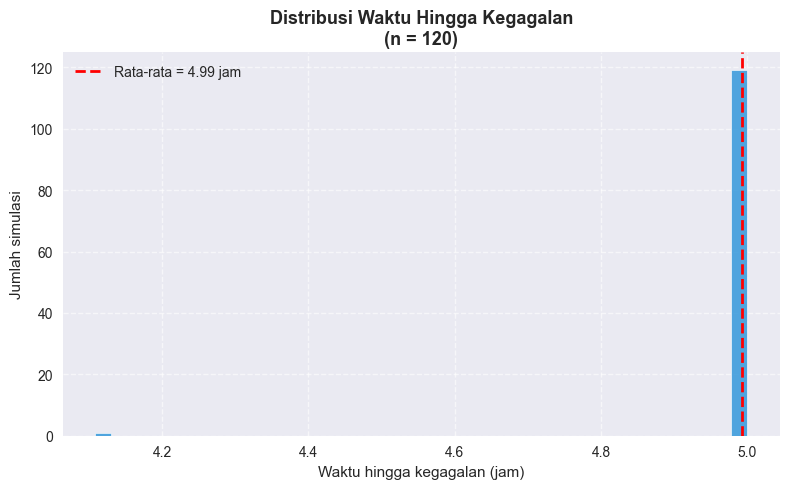

In [96]:
plt.figure(figsize=(8, 5))
plt.hist(times, bins=40, color='#3498db', alpha=0.85, edgecolor='white', linewidth=0.5)
plt.axvline(mean_ttf, color='red', linestyle='--', linewidth=2, 
    label=f'Rata-rata = {mean_ttf:.2f} jam')
plt.title(f'Distribusi Waktu Hingga Kegagalan\n(n = {n:,})', fontsize=13, weight='bold')
plt.xlabel('Waktu hingga kegagalan (jam)', fontsize=11)
plt.ylabel('Jumlah simulasi', fontsize=11)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('1_waktu_kegagalan.png', dpi=300, bbox_inches='tight')
plt.show()

Analisis:  

    Jika distribusi terkonsentrasi di sebelah kanan (mendekati 5 jam), artinya sebagian besar balon bertahan hingga akhir periode observasi → sistem relatif andal.  
    Jika ada puncak di kiri (misal di 0.5–2 jam), menunjukkan adanya risiko kegagalan dini akibat kombinasi tekanan tinggi dan material lemah.  
    Garis merah (rata-rata) memberikan estimasi ekspektasi waktu kegagalan. Misalnya, rata-rata 3.2 jam berarti secara probabilistik, balon cenderung gagal setelah ~3 jam penerbangan.

 **Visualisasi Prob Kegagalan Balon Udara**

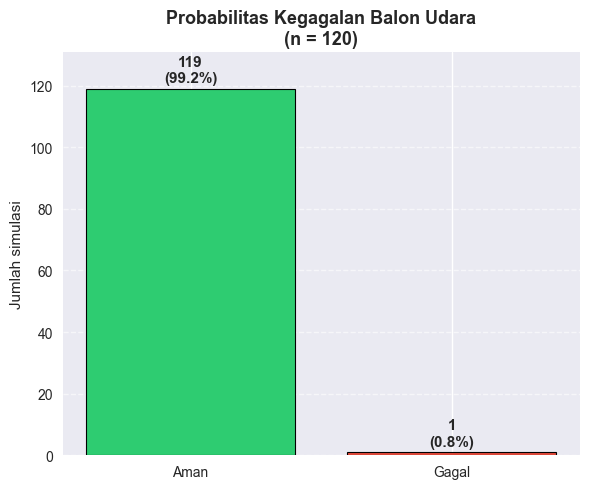

In [97]:
plt.figure(figsize=(6, 5))
labels = ['Aman', 'Gagal']
counts = [n - n_fail, n_fail]
colors = ['#2ecc71', '#e74c3c']
bars = plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=0.8)
    
    # tambahkan nilai persentase di atas batang
for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count}\n({count/n*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, weight='bold')
    
plt.title(f'Probabilitas Kegagalan Balon Udara\n(n = {n:,})', fontsize=13, weight='bold')
plt.ylabel('Jumlah simulasi', fontsize=11)
plt.ylim(0, max(counts) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('2_probabilitas_kegagalan.png', dpi=300, bbox_inches='tight')
plt.show()

Analisis:  

    Persentase kegagalan (misal 12.4%) merepresentasikan risiko kegagalan dalam kondisi operasional acak.  
    Nilai ini bukan deterministik, melainkan estimasi statistik dari ketidakpastian parameter input.  
    Semakin besar jumlah simulasi (n), semakin andal estimasi probabilitas ini (sesuai Hukum Bilangan Besar).

 **Visualisasi Stress Efektif vs Kekuatan Material**

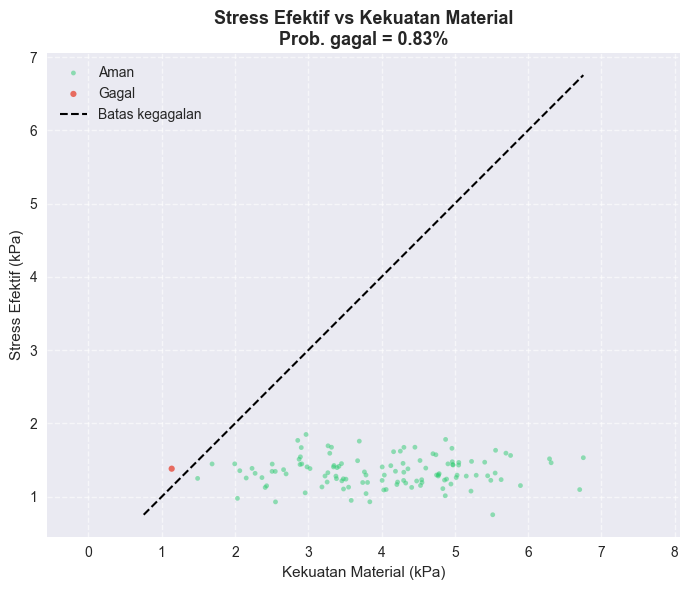

In [98]:
plt.figure(figsize=(7, 6))
safe = ~failures
    # plot titik aman (hijau)
plt.scatter(strengths[safe], stresses[safe], 
                c='#2ecc71', s=12, alpha=0.5, label='Aman', edgecolors='none')
    # plot titik gagal (merah)
plt.scatter(strengths[failures], stresses[failures], 
                c='#e74c3c', s=20, alpha=0.8, label='Gagal', edgecolors='none')
    
    # garis batas kegagalan: stress = strength
min_val = min(strengths.min(), stresses.min())
max_val = max(strengths.max(), stresses.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1.5, label='Batas kegagalan')
    
plt.xlabel('Kekuatan Material (kPa)', fontsize=11)
plt.ylabel('Stress Efektif (kPa)', fontsize=11)
plt.title(f'Stress Efektif vs Kekuatan Material\nProb. gagal = {prob_fail*100:.2f}%', 
            fontsize=13, weight='bold')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')  # agar garis diagonal benar-benar 45 derajat
plt.tight_layout()
plt.savefig('3_stress_vs_strength.png', dpi=300, bbox_inches='tight')
plt.show()

Analisis:  

    Titik hijau (aman) berada di bawah garis diagonal → stress < kekuatan → struktur bertahan.  
    Titik merah (gagal) berada di atas garis diagonal → stress > kekuatan → kegagalan terjadi.  
    Sebaran titik menunjukkan bagaimana variasi parameter input (terutama suhu dan kualitas material) memengaruhi margin keamanan.  
    Jika banyak titik berkumpul dekat garis, sistem beroperasi dengan margin keamanan tipis → rentan terhadap gangguan kecil.